### Option Volume to SPY comparision

In this note it tries to see if there is a correlitation between daily options volume to the movement in SPY. It fetches the daily data for a

In [9]:
import numpy as py
import matplotlib.pyplot as plt
import pandas as pd
import yfinance as yf
import urllib.request as request
import json
from datetime import datetime
import seaborn as sns

##### Plot styles

In [10]:
sns.set_theme(palette="pastel")
plt.rcParams["figure.figsize"] = (20,10)

##### The timeframe for the analysis

In [20]:
startDate = "2022-08-01"
endDate = "2022-08-31"

##### Fetch SPY data.

In [3]:
spy = yf.download("SPY", start=startDate, end=endDate)
spy

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2022-08-01,409.149994,413.410004,408.399994,410.769989,410.769989,69997500
2022-08-02,409.119995,413.000000,406.820007,408.059998,408.059998,63435400
2022-08-03,410.299988,415.679993,410.000000,414.450012,414.450012,67820600
2022-08-04,414.369995,415.089996,412.440002,414.170013,414.170013,45656600
2022-08-05,409.660004,414.149994,409.600006,413.470001,413.470001,56814900
2022-08-08,415.250000,417.619995,411.829987,412.989990,412.989990,53886100
2022-08-09,412.220001,412.750000,410.220001,411.350006,411.350006,44931800
2022-08-10,418.779999,420.140015,416.720001,419.989990,419.989990,68665700
2022-08-11,422.989990,424.950012,419.209991,419.989990,419.989990,59489700


##### Fetches the daily options volue for OCC website for the selected month.

In [4]:
url = f'https://marketdata.theocc.com/mdapi/historical-volume?report_type=VS&report_time=D&report_date={endDate}'

response = request.urlopen(url)
data = json.loads(response.read())

#Parse the daily options volume data
daily_volume_data = []

for row in data["entity"]["dailyVolumeDataList"]:
    daily_volume_data.append({
        "Date": datetime.fromtimestamp(row["activityDate"] / 1000), #Convert date from milisecond to seconds.
        "OCCTotal": row["occTotal"]
    })
    
daily_options_volume = pd.DataFrame(daily_volume_data)
daily_options_volume.sort_index(ascending=False, inplace=True)
daily_options_volume.set_index("Date", inplace=True)

daily_options_volume

,OCCTotal
Date,
2022-08-01,37492922
2022-08-02,36217688
2022-08-03,43038560
2022-08-04,37876033
2022-08-05,45286839
2022-08-08,41084213
2022-08-09,33525612
2022-08-10,43830903
2022-08-11,46041164


##### Plot both options and spy together for analysis

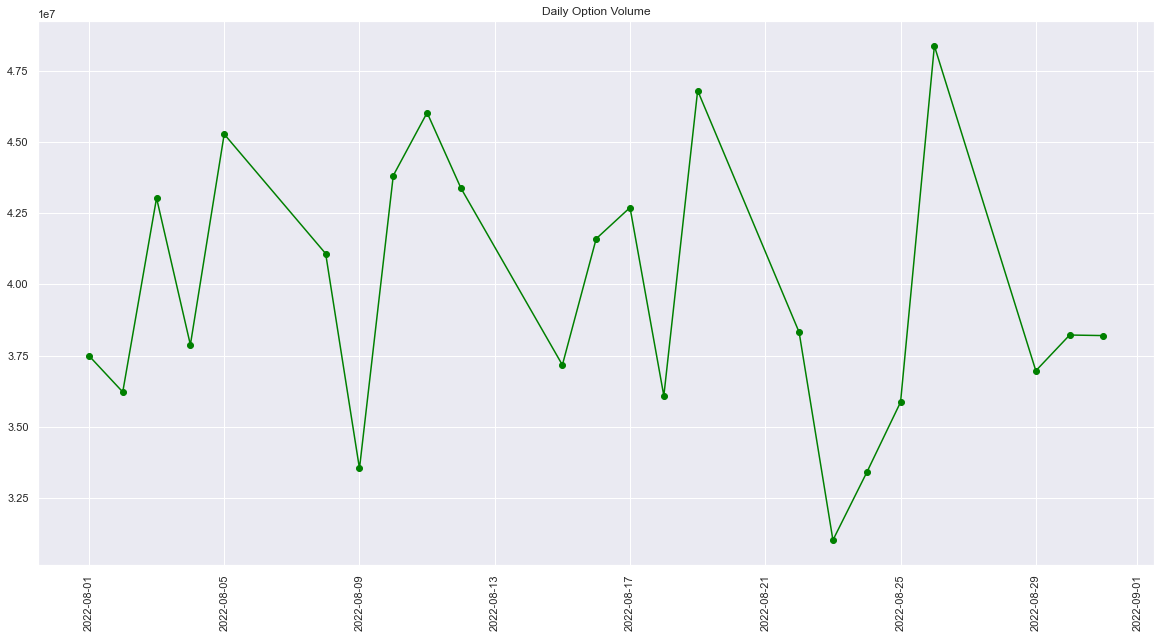

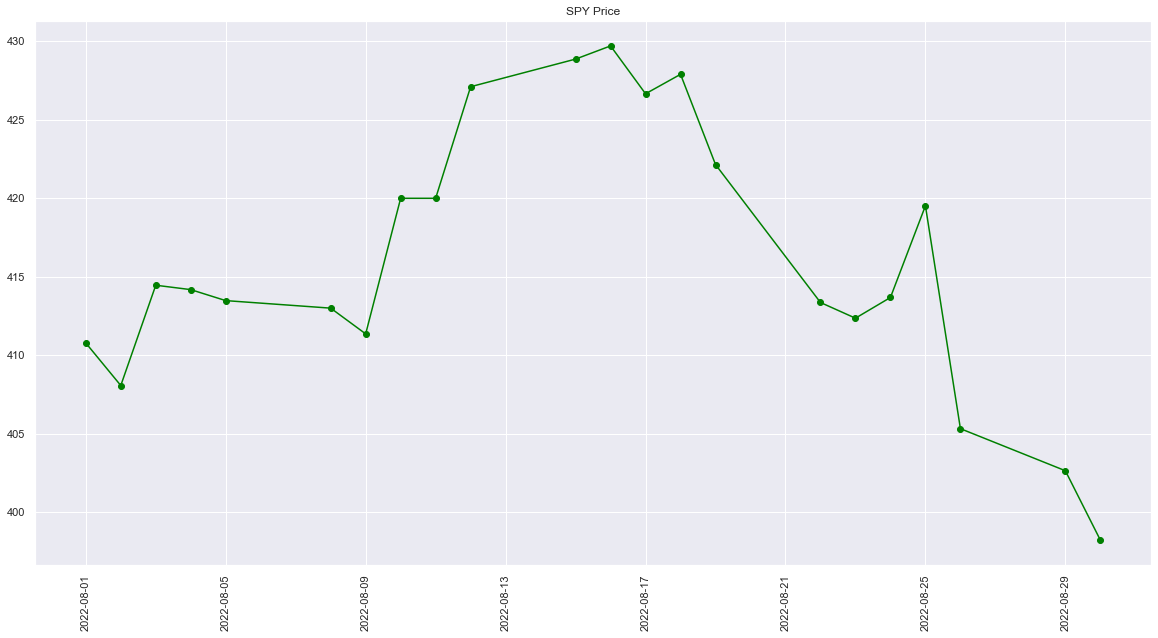

In [19]:
plt.xticks(rotation='vertical')

plt.title("Daily Option Volume")
plt.plot(daily_options_volume.index, daily_options_volume["OCCTotal"], marker = 'o', color='green')
plt.show()

plt.title("SPY Price")
plt.xticks(rotation='vertical')
plt.plot(spy.index, spy["Close"], marker = 'o', color='green')
plt.show()